In [1]:
import pandas as pd
import joblib 
import datetime as dt
from functions.Strategy import *
from functions.UtilsCreateDataFrame import *
from functions.UtilsGoogleDrive import *
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
import scipy 
plt.rcParams["figure.figsize"] = (15,5)
import matplotlib.pyplot as plt 

In [3]:
asset_1 = "DOGE"
asset_2 = "DOT"
result = joblib.load(f"H:/{asset_1}_{asset_2}/{asset_1}_{asset_2}.joblib")
#load the dataframe
path = "H:\AllTickers_trades_weighted_2020-12_2021-12.csv.gz"
coin_df = loadCleanDataFrame(path)
frequency = {"minutes":1}
frequency = dt.timedelta(**frequency)

In [4]:
month = result["2021-04"]
month[0]

,0.100,0.050,0.010,0.005
0 days 00:30:00,0.018534,0.334376,0.825644,0.977287
0 days 01:00:00,1.355137,0.211386,1.020129,0.88964
0 days 02:00:00,0.220719,0.417383,5.731937,0.850708
0 days 04:00:00,0.565861,0.05618,0.053119,0.025267
0 days 06:00:00,0.038844,0.007713,0.04382,0.023402
0 days 12:00:00,0.028009,0.021052,0.008856,0.013793


In [7]:
freq = {"hours":12}
pval = 0.01
trades = month[1][f"{freq}_{pval}"]

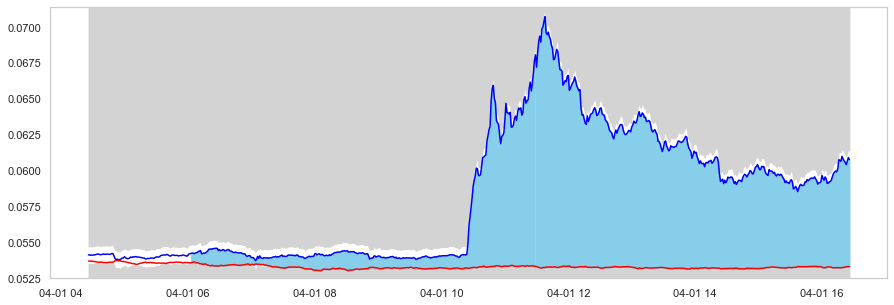

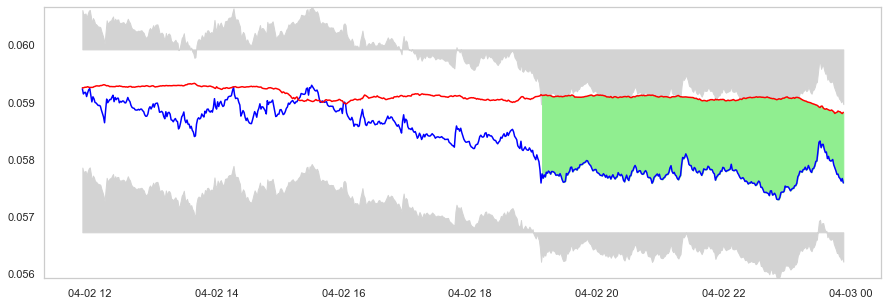

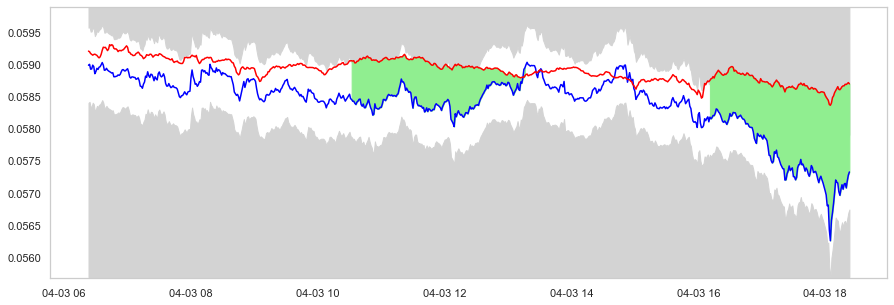

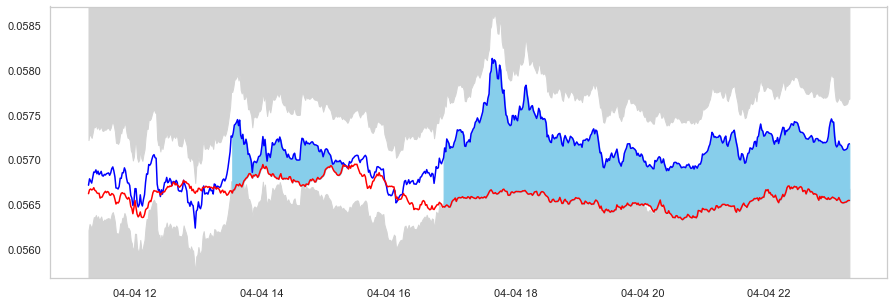

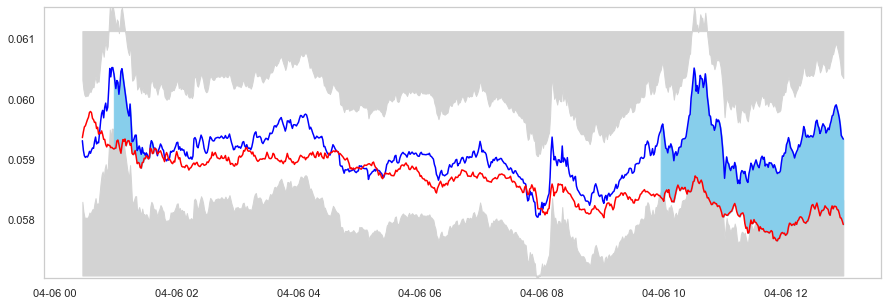

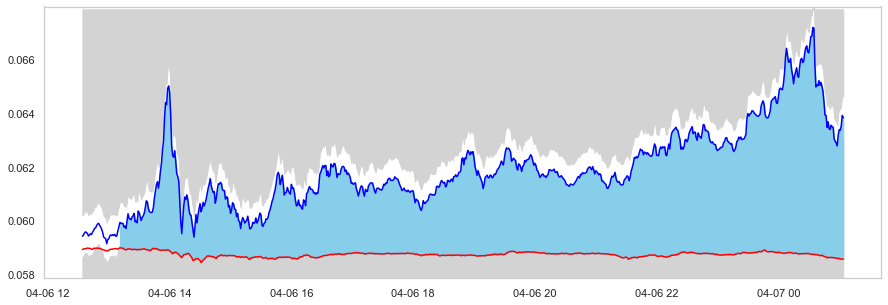

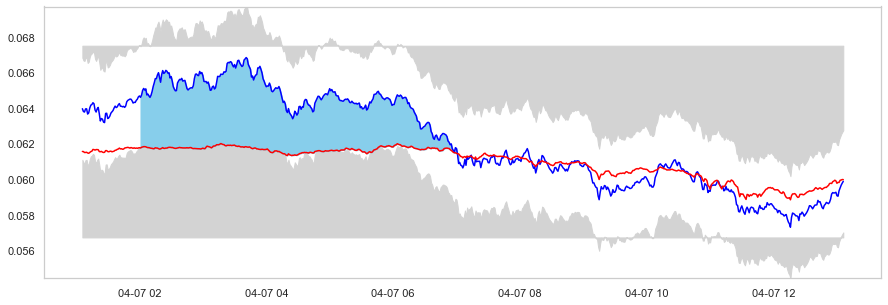

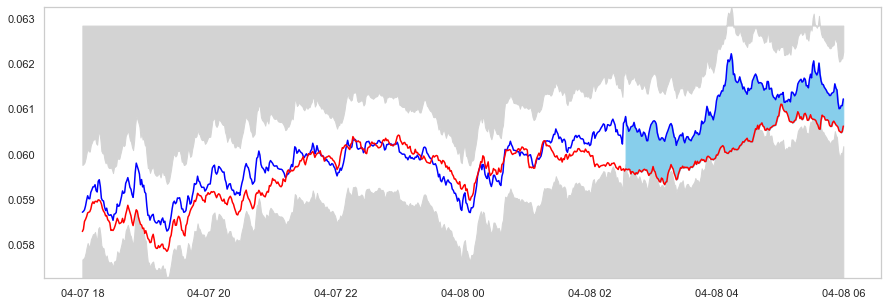

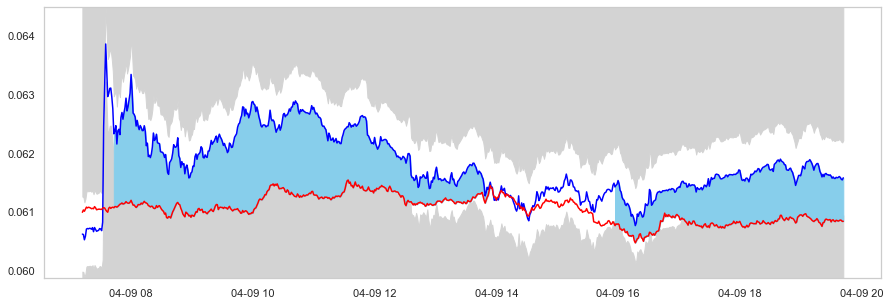

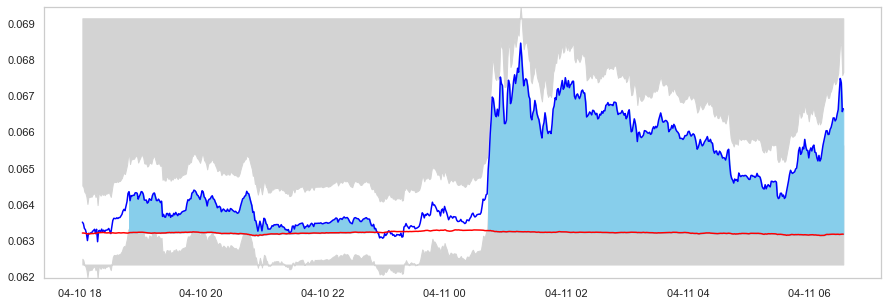

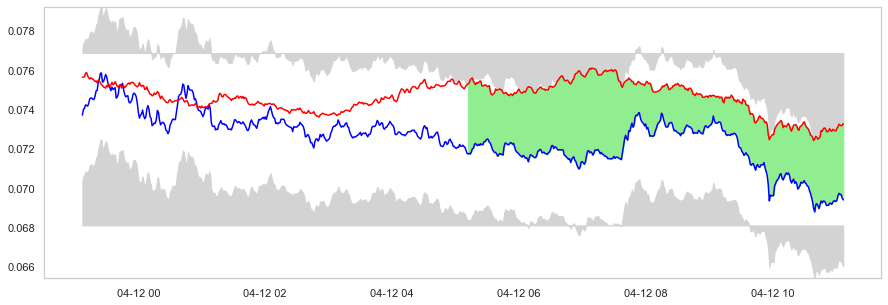

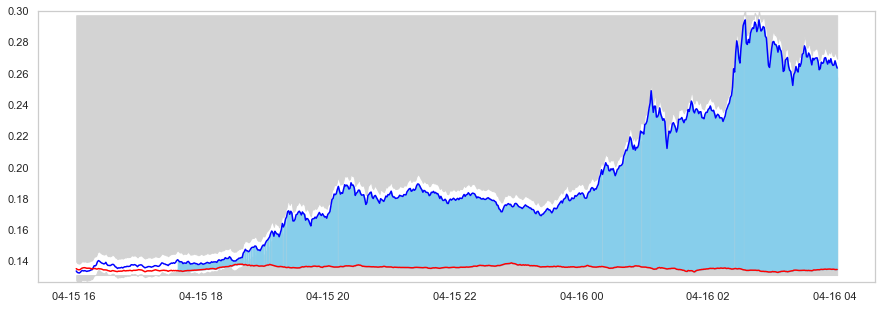

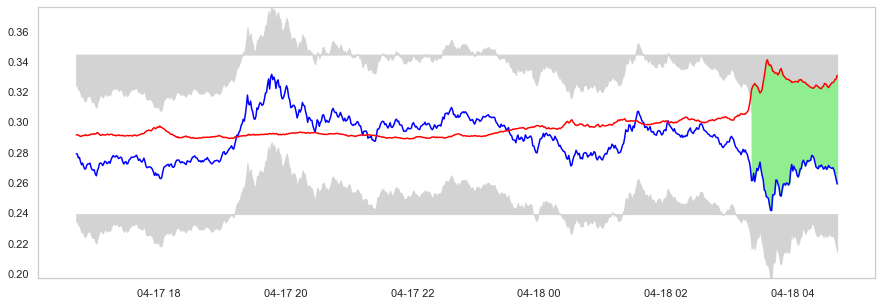

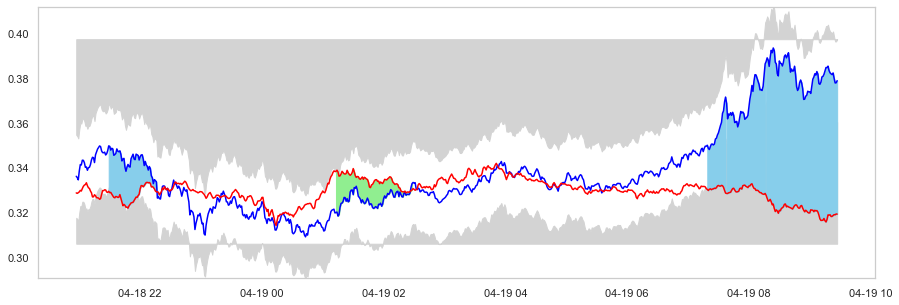

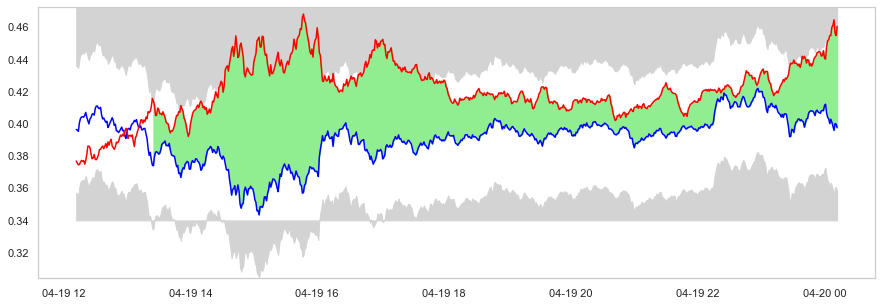

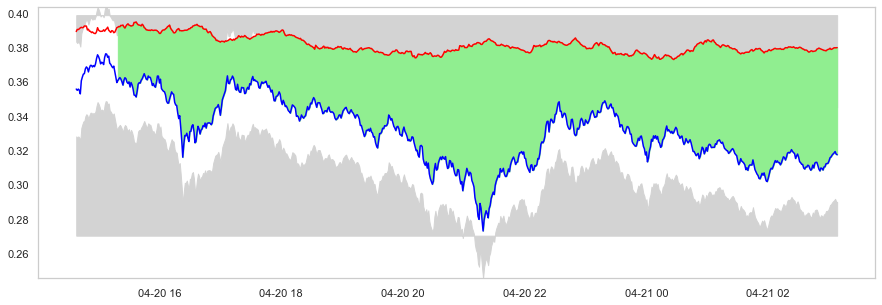

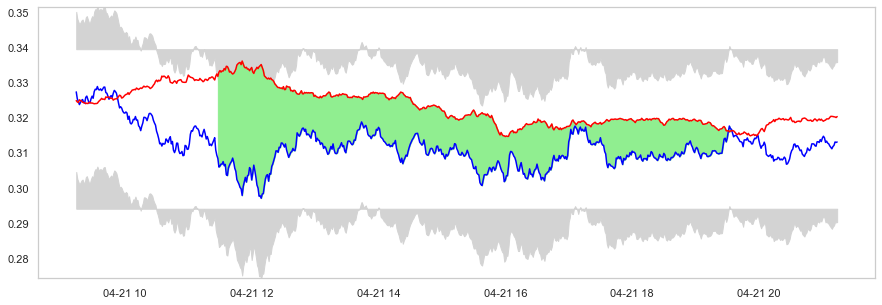

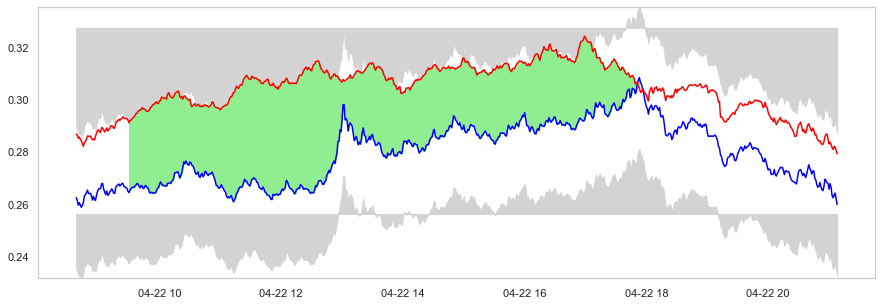

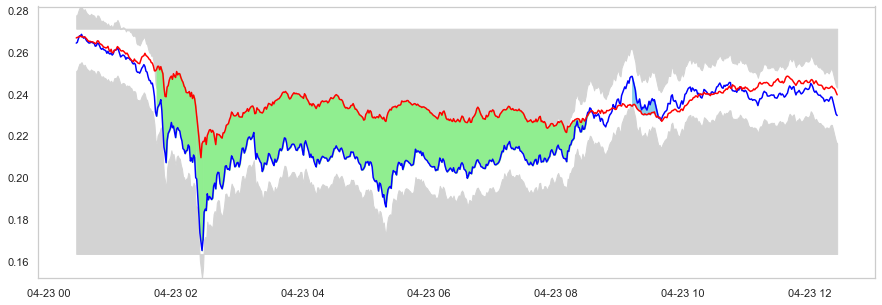

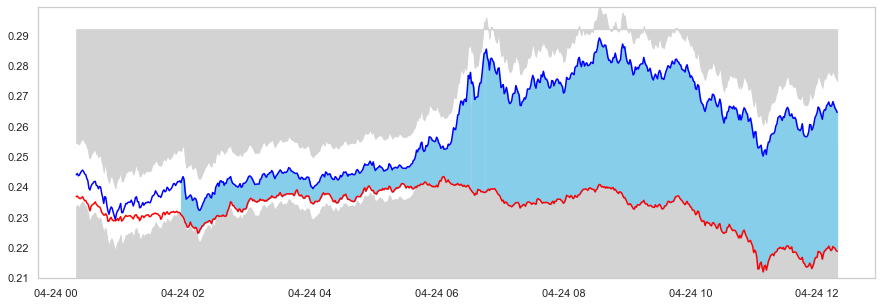

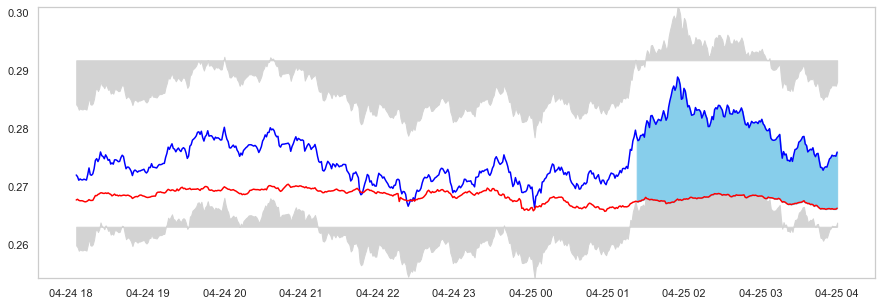

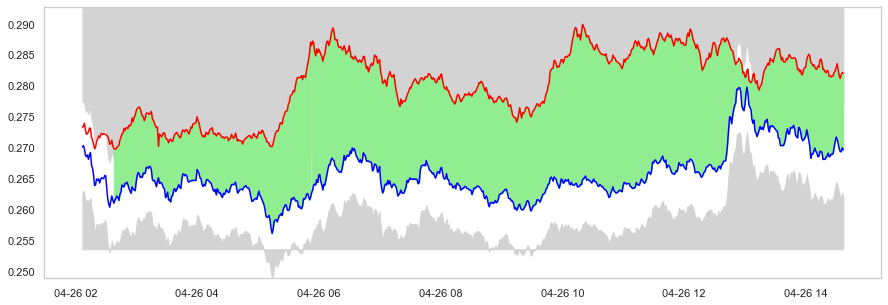

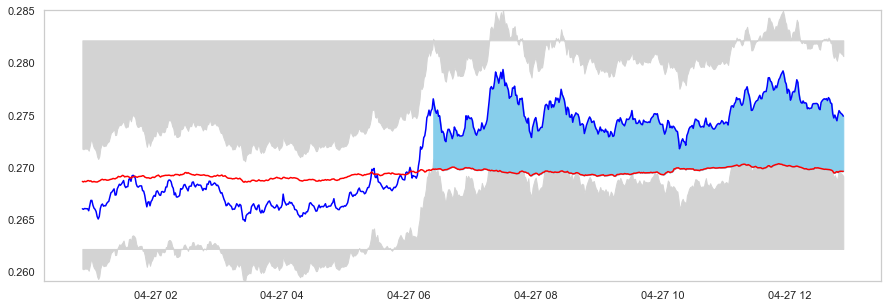

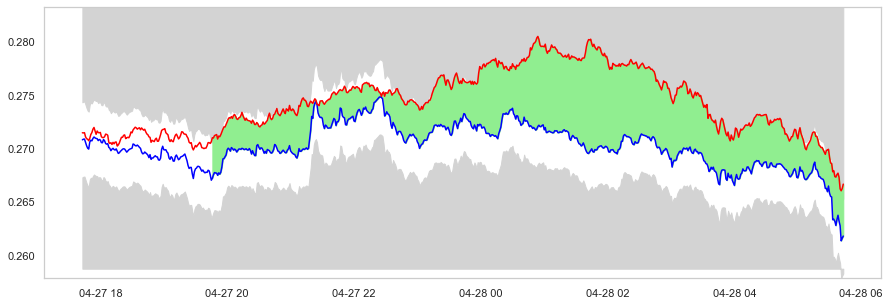

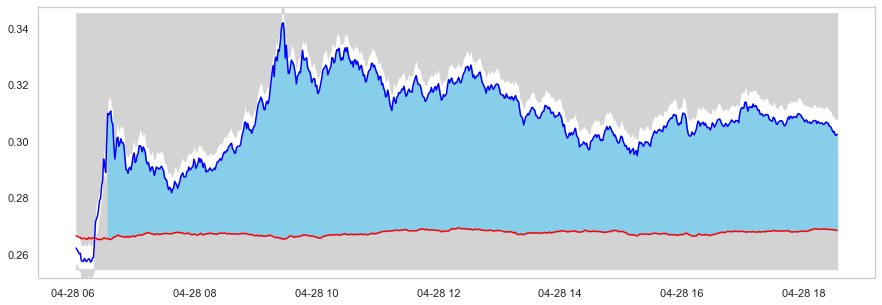

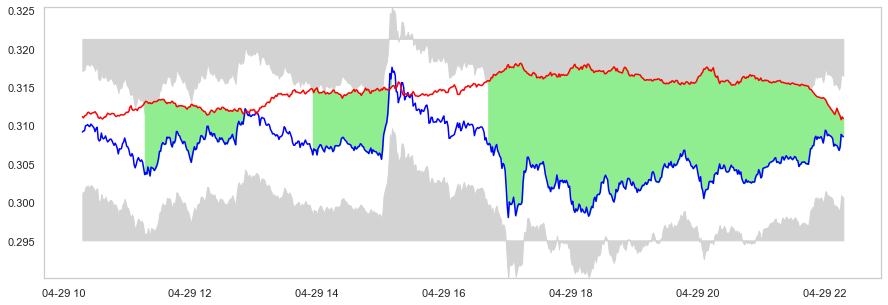

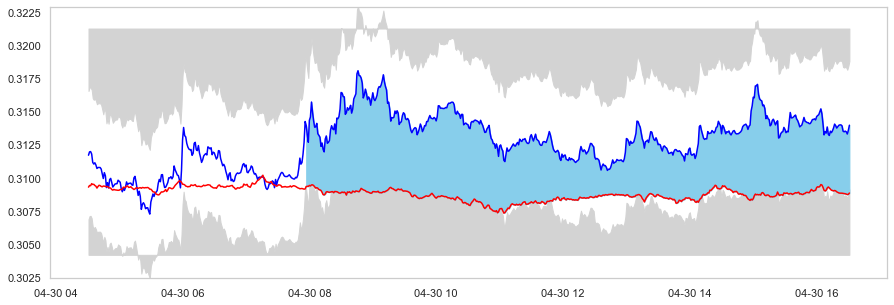

In [8]:
#select the second trading window 


for j in range(len(trades.beta.unique()[:])):
    
        beta = trades.beta.unique()[j]
        intercept = trades.intercept.unique()[j]
        sigma =  trades.res_std.unique()[j]
        tr = trades.loc[trades.beta == beta]
        starting =  pd.to_datetime(tr.date_est.iloc[0]) + frequency

        ending = starting + dt.timedelta(**freq)
        list_open_close = [(open_, close_) for open_, close_ in zip(tr.enter_,tr.exit_)]
        full_list = []
        
        if starting + dt.timedelta(**{"minutes":30}) > list_open_close[0][0]:
            starting = starting - dt.timedelta(**{"minutes":30})
        df = coin_df.loc[starting:ending,[asset_1, asset_2]]

        for open_, close_ in list_open_close:
            full = pd.date_range(start = open_, end = close_, freq = "1min")
            full_list.append(full)

        estim = df[asset_2]*beta + intercept
        plt.plot(df[asset_1], linewidth = 1.5, color = "blue")
        plt.plot(estim, linewidth = 1.5, color = "red")
        y_lim = (min(estim.min(),df[asset_1].min())*0.99, max(estim.max(),df[asset_1].max())*1.010 )
        plt.ylim = y_lim
        plt.fill_between(df[asset_1].index, df[asset_1]+ 2*sigma, y_lim[1], color = "lightgrey")
        plt.fill_between(df[asset_1].index, df[asset_1]- 2*sigma, y_lim[0], color = "lightgrey")
        plt.grid(False)
        plt.margins(y=0)
#         plt.plot(df["ADA"]+ 2*sigma, linewidth = 0.5, color = "black")        
#         plt.plot(df["ADA"]- 2*sigma, linewidth = 0.5, color = "black")        
        
        for idx, full in enumerate(full_list):
            if tr.ret_type.iloc[idx] == "Long":
                color = "lightgreen"
            else: 
                color = "skyblue"
            plt.fill_between(full, df.loc[full, asset_1], df.loc[full, asset_2]*beta + intercept, color = color)
        plt.show()